In [12]:
from skimage import io
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from random import shuffle
from glob import glob
from sklearn.externals import joblib
%matplotlib inline

In [3]:
filenames = glob('../images/training_data/*.jpg')
training_data = []
for filename in filenames:
    training_data.append(io.imread(filename))

In [4]:
print(len(training_data))

400


In [5]:
X_grid_colour_means = []

for image in training_data: 
    GRID_WIDTH = 20
    resized_painting = resize(image, (200, 200))
    result = []
    for i in range(10):
        for j in range(10):
            grid = resized_painting[
                i*GRID_WIDTH:i*GRID_WIDTH+GRID_WIDTH,
                j*GRID_WIDTH:j*GRID_WIDTH+GRID_WIDTH,
                :
            ]
            result.append(grid[:, :, 0].mean())
            result.append(grid[:, :, 1].mean())
            result.append(grid[:, :, 2].mean())

    X_grid_colour_means.append(result)

/Users/lowthe01/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [6]:
est = KMeans(n_clusters=5)
est.fit(X_grid_colour_means)
print(est.labels_)
print(len(est.labels_))

[3 2 2 2 3 3 3 2 3 3 3 2 3 2 3 2 3 2 2 3 2 2 3 3 2 2 2 2 2 3 2 2 3 2 2 3 2
 2 3 3 3 3 3 3 2 3 2 2 1 3 2 2 2 3 3 3 2 2 0 2 3 2 3 3 0 3 2 2 2 3 3 3 3 3
 3 3 2 3 2 0 3 1 3 2 3 1 0 3 3 2 3 3 2 1 3 3 2 3 1 3 2 3 2 3 3 1 3 2 3 3 3
 3 3 3 2 4 3 3 1 3 3 2 3 2 3 3 3 3 0 3 2 2 2 2 3 0 3 3 3 1 1 1 3 3 3 3 1 3
 3 3 3 3 2 3 3 3 3 3 3 3 1 4 4 3 4 2 2 4 4 3 3 3 0 2 2 2 3 3 2 2 2 2 2 3 3
 2 4 0 2 4 3 3 2 2 1 2 2 2 2 4 3 3 0 4 4 3 3 2 2 4 3 2 2 2 2 2 2 4 4 2 2 3
 2 2 2 4 4 4 3 2 2 4 2 2 3 4 2 4 4 3 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 3 0 0 0 3 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 1 2 4 1 3 0 3 0 0
 2 1 3 3 1 0 1 3 0 0 0 3 0 3 2 0 1 2 1 0 0 2 0 0 1 1 1 2 3 2 3 1 0 2 1 4 4
 4 1 4 1 1 0 3 3 3 2 2 1 2 1 1 3 4 1 1 2 4 1 1 1 1 1 1 1 1 3]
400


IndexError: index 96 is out of bounds for axis 0 with size 96

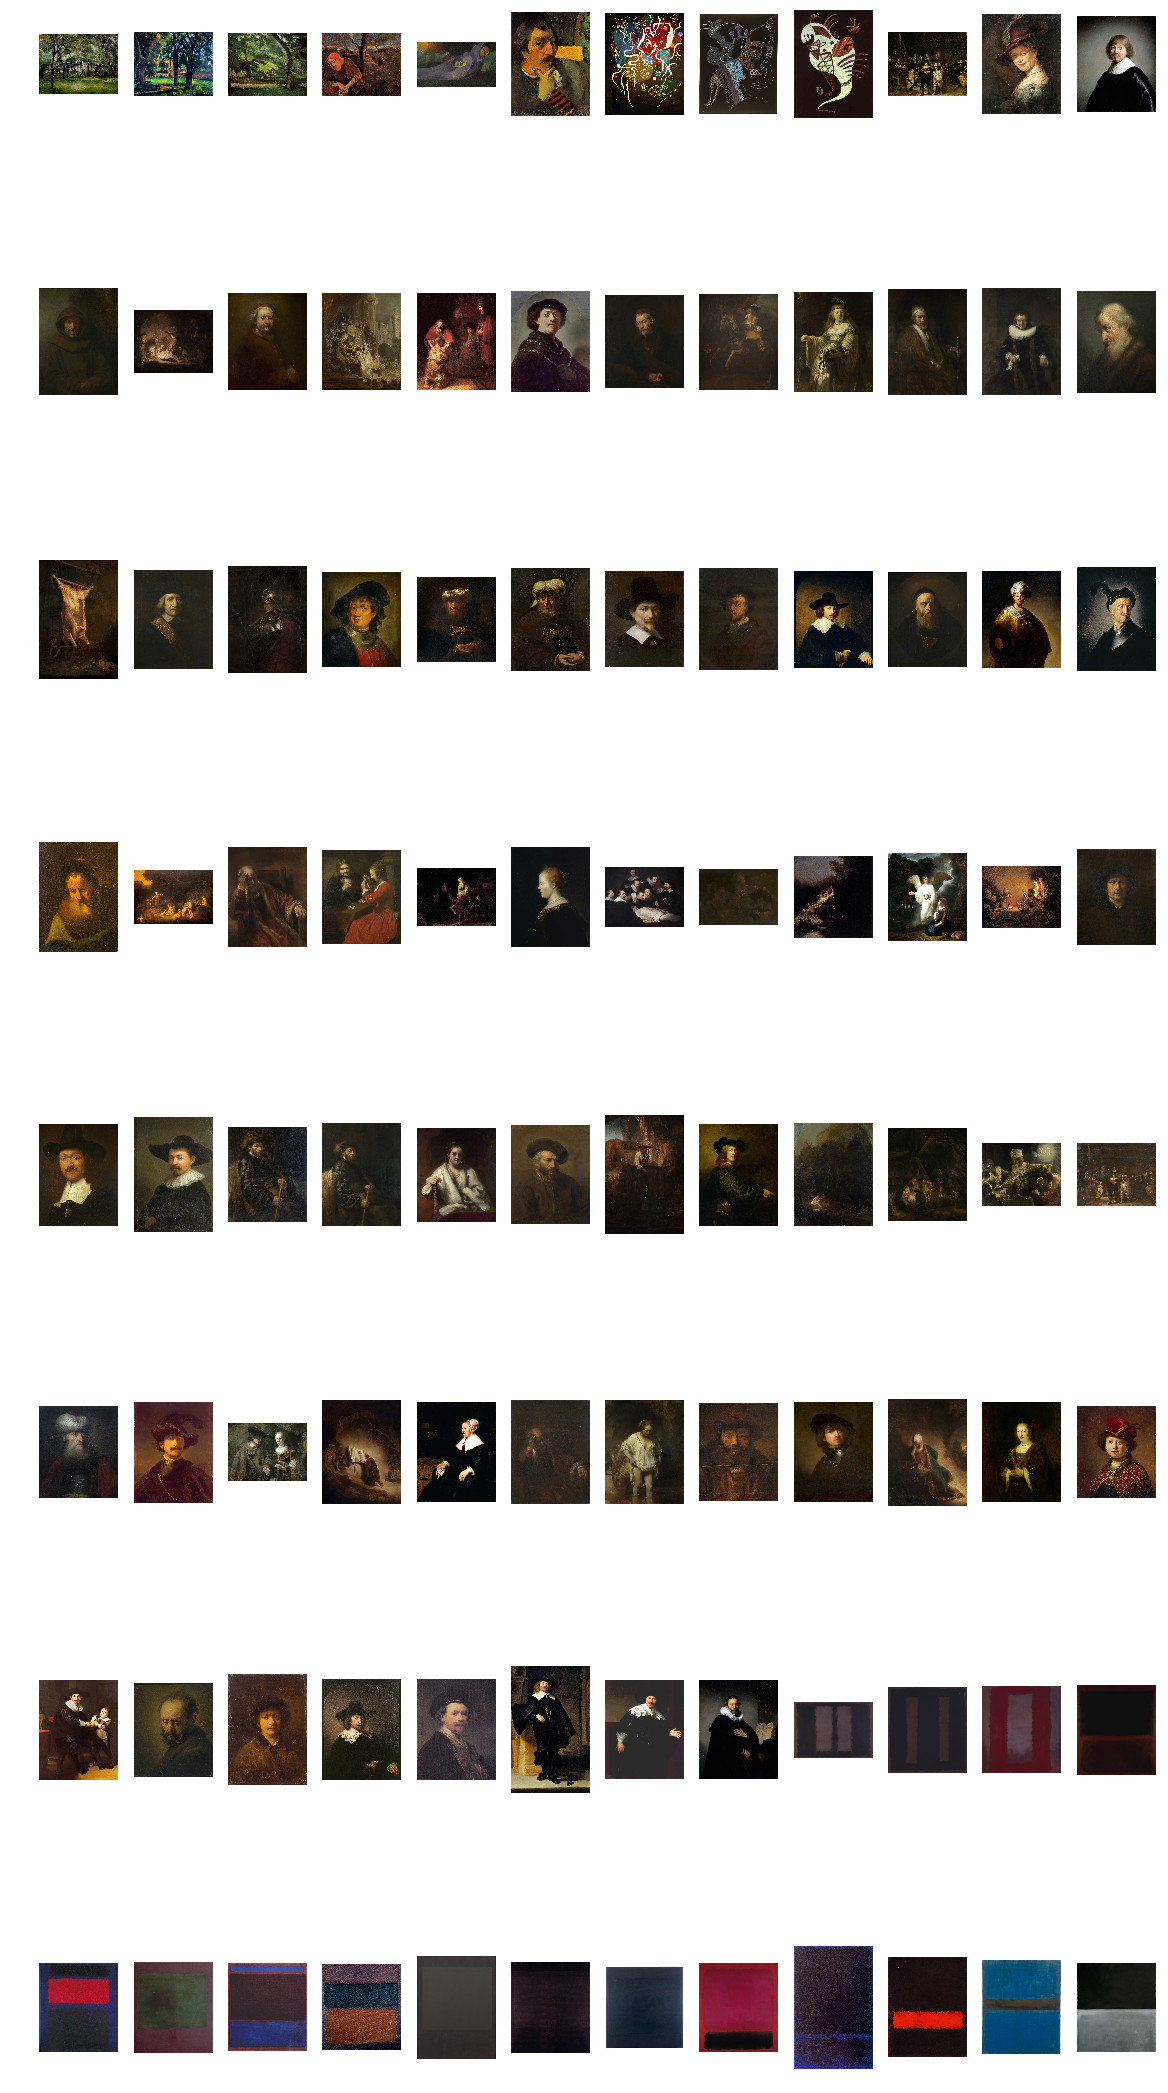

In [19]:
def show_matching_images(label_to_show): 
    images_to_show = []
    for i, label in enumerate(est.labels_): 
        if label == label_to_show: 
            images_to_show.append(training_data[i])
            
    f, axes = plt.subplots(nrows=8, ncols=len(images_to_show) // 8, figsize=(20, 40))

    for i, image in enumerate(images_to_show):
        axes.flat[i].imshow(image, cmap='gray')
        axes.flat[i].axis('off')

    plt.tight_layout()
    
show_matching_images(0)  

In [14]:
from collections import defaultdict

def get_art_movement_name(group_id): 
    result = defaultdict(int)
    for i, label in enumerate(est.labels_): 
        if label == group_id: 
#             movement_name = "-".join(filenames[i].split("../images/")[1].split("_")[1:-1])
#             result.add(movement_name)
            artist_name = filenames[i].split("../images/training_data/")[-1].split("_")[0]
            result[artist_name] += 1 
#     print("-".join(result) + 'ism')
    print(result)

get_art_movement_name(0)

defaultdict(<class 'int'>, {'cezanne': 3, 'gauguin': 3, 'kandinsky': 3, 'rembrandt': 71, 'rothko': 18})


In [9]:
joblib.dump(est, '../image_uploader/media/unsupervised_five_bins.pkl')

['../image_uploader/media/unsupervised.pkl']